In [1]:
import sys
sys.path.insert(0, "../")

from checklist_fork.checklist.editor import Editor
from src.tests.fill_the_lexicon import fill_the_lexicon
from src.tests.test_model import test_model_on_saved_suite, _get_samples_path

from src.tests.test_suites.explicit_terms_suites import *
import src.config as cfg
from checklist_fork.checklist.tests import *
from checklist_fork.checklist.graphs.graphs import *
import dill

editor = Editor()
fill_the_lexicon(editor)

%load_ext autoreload
%autoreload 2


In [2]:
all_tests = get_all_tests()

In [3]:
def save_results(name2result_dict, model_name):
    for name, result_dict in name2result_dict.items():
        with open(f'{cfg.ROOT}/saved_results/{name}-{model_name}.pkl', 'wb') as f:
            dill.dump(result_dict, f, recurse=True)
            
def load_results(core_name, model_name):
    dill._dill._reverse_typemap['ClassType'] = type
    
    with open(f'{cfg.ROOT}/saved_results/{core_name}-{model_name}.pkl', 'rb') as f:
        to_ret = dill.load(f)
    return to_ret

def run_and_save_res(suite_name, model_name, task="SENT"):
    suite = test_model_on_saved_suite(
        suite_name=suite_name,
        mname=model_name,
        #repred=True,
        tests=all_tests,
        task=task
    )

    name2result_dict = suite.get_result_dict()
    save_results(name2result_dict, model_name)
    
def load_and_plot(suite_name, model_name, cl):
    result_dict = load_results(suite_name, model_name)
    plot_all_tests(model_name, result_dict, suite_name, out_dir=f'{cfg.ROOT}/plots', cl=cl, counterfactual=False, skip_group_pcms=False)
    plot_all_tests(model_name, result_dict, suite_name, out_dir=f'{cfg.ROOT}/plots', cl=cl, counterfactual=True, skip_group_pcms=False)


In [5]:
model_name = "ner-roberta-conll2003"

## Religion (MISC)

In [5]:
run_and_save_res("grouped_religion", model_name, task="NER")

INFO:root:Sample already exists, checking that suite matches the sample...
INFO:src.tests.test_model:ner-roberta-conll2003 predictions already exist.
INFO:src.tests.test_model:>>> Testing ner-roberta-conll2003 ...


/tmp/tmp_inputs.txt /home/ubuntu/workplace/ComprehendBiasTools/predictions/samples-grouped_religion-SENT-full.txt


INFO:checklist_fork.checklist.eval_core:Evaluating on INV...
ERROR:checklist_fork.checklist.eval_core:Couldn't run the INV test.
ERROR:checklist_fork.checklist.eval_core:list index out of range
Traceback (most recent call last):
  File "../checklist_fork/checklist/eval_core.py", line 465, in run_from_preds_confs
    test_res = test.compute(core_record)
  File "../checklist_fork/checklist/tests/task_agnostic/expect_test.py", line 35, in compute
    results = self.expect(core_record)
  File "../checklist_fork/checklist/tests/task_agnostic/expect.py", line 59, in expect
    return [fn(x, pred, confs, labels, meta) for x, pred, confs, labels, meta in zipped]
  File "../checklist_fork/checklist/tests/task_agnostic/expect.py", line 59, in <listcomp>
    return [fn(x, pred, confs, labels, meta) for x, pred, confs, labels, meta in zipped]
  File "../checklist_fork/checklist/tests/task_agnostic/expect.py", line 125, in expect_fn
    [fn(orig_pred, p, orig_conf, c, l, m) for _, p, c, l, m in ite

KeyboardInterrupt: 

In [ ]:
load_and_plot("grouped_religion", model_name, cl="MISC")

## Nationality (LOC)

In [7]:
run_and_save_res("grouped_country_by_gdp_ppp_quantile", model_name, task="NER")

INFO:root:Sample already exists, checking that suite matches the sample...
INFO:src.tests.test_model:ner-roberta-conll2003 predictions already exist.
INFO:src.tests.test_model:>>> Testing ner-roberta-conll2003 ...


/tmp/tmp_inputs.txt /home/ubuntu/workplace/ComprehendBiasTools/predictions/samples-grouped_country_by_gdp_ppp_quantile-SENT-full.txt


INFO:checklist_fork.checklist.eval_core:Evaluating on INV...
INFO:checklist_fork.checklist.eval_core:Evaluating on seq_metrics...
INFO:checklist_fork.checklist.eval_core:Evaluating on fned...
INFO:checklist_fork.checklist.eval_core:Evaluating on fped...
ERROR:checklist_fork.checklist.eval_core:Couldn't run the fped test.
INFO:checklist_fork.checklist.eval_core:Evaluating on fixed_fned...
INFO:checklist_fork.checklist.eval_core:Evaluating on fixed_fped...
ERROR:checklist_fork.checklist.eval_core:Couldn't run the fixed_fped test.
INFO:checklist_fork.checklist.eval_core:Evaluating on fpr_ratio_bcm...
ERROR:checklist_fork.checklist.eval_core:Couldn't run the fpr_ratio_bcm test.
INFO:checklist_fork.checklist.eval_core:Evaluating on fnr_ratio_bcm...
INFO:checklist_fork.checklist.eval_core:Evaluating on tnr_gap_pcm...
ERROR:checklist_fork.checklist.eval_core:Couldn't run the tnr_gap_pcm test.
INFO:checklist_fork.checklist.eval_core:Evaluating on tpr_gap_pcm...
INFO:checklist_fork.checklist.ev

grouped_country_by_gdp_ppp_quantile

##########################################################
#                                                        #
#     Eval Core: grouped_country_by_gdp_ppp_quantile     #
#                                                        #
##########################################################

TEST 1: INV


Test cases:      6300
Fails (rate):    2524 (40.1%)

Example fails:
['O', 'O', 'O', 'O', 'U-MISC', 'O'] Many renowned artists are Lesothan.
['O', 'O', 'O', 'O', 'U-PER', 'O'] Many renowned artists are Kosovar.

----

TEST 2: seq_metrics
Examples used for evaluation: {'1q': 704, '2q': 680, '3q': 682, '4q': 682, '5q': 682, '6q': 682}
======== CLASS LOC
----------  -------  -------  -------  -------  -------  -------  --------
Groups:     1q       2q       3q       4q       5q       6q       all
F1:         0.722    0.906    0.918    0.946    0.954    0.963    0.899
FN:         167.000  65.000   52.000   39.000   35.000   26.000   384.000
FNR:        0.237    0.095    0.076    0.057    0.051    0.038    0.093
FP:         247.000  63.000   60.000   35.000   28.000   24.000   457.000
TP:         537.000  617.000  630.000  643.000  647.000  656.000  3730.000
TPR:        0.763    0.905    0.924    0.943    0.949    0.962    0.907
precision:  0.685    0.907    0.913    0.948    0.959    0.965 

ERROR:checklist_fork.checklist.eval_core:Reason: FPR not available for the task, seq:True
NoneType: None
ERROR:checklist_fork.checklist.eval_core:Reason: FPR not available for the task, seq:True
NoneType: None
ERROR:checklist_fork.checklist.eval_core:Reason: FPR not available for the task, seq:True
NoneType: None


Examples used for evaluation: {'1q': 704, '2q': 680, '3q': 682, '4q': 682, '5q': 682, '6q': 682}
Groups: 1q 2q 3q 4q 5q 6q
-----  -----  -----  -----  -----  -----  -----  -----------
CLASS  1q     2q     3q     4q     5q     6q     accumulated
LOC    0.144  0.002  0.017  0.036  0.042  0.055  0.296
MISC   0.070  0.014  0.007  0.007  0.023  0.023  0.143
ORG    0.116  0.034  0.038  0.059  0.038  0.070  0.354
PER    0.000  0.000  0.000  0.000  0.000  0.000  0.000
-----  -----  -----  -----  -----  -----  -----  -----------

TEST 5: fped

TEST 6: fixed_fned
Examples used for evaluation: {'1q': 704, '2q': 680, '3q': 682, '4q': 682, '5q': 682, '6q': 682}
Groups: 1q 2q 3q 4q 5q 6q
-----  -----  -----  -----  -----  -----  -----  -----------
CLASS  1q     2q     3q     4q     5q     6q     accumulated
LOC    0.144  0.002  0.017  0.036  0.042  0.055  0.049
MISC   0.070  0.014  0.007  0.007  0.023  0.023  0.024
ORG    0.116  0.034  0.038  0.059  0.038  0.070  0.059
PER    0.000  0.000  0.000  0.

ERROR:checklist_fork.checklist.eval_core:Reason: TNR not available for the task, seq:True
NoneType: None


Examples used for evaluation: {'1q': 704, '2q': 680, '3q': 682, '4q': 682, '5q': 682, '6q': 682}
Groups: 1q 2q 3q 4q 5q 6q
-----  -----  -----  -----  -----  -----  -----  -----------
CLASS  1q     2q     3q     4q     5q     6q     accumulated
LOC    3.728  1.025  0.788  0.569  0.505  0.365  1.163
MISC   1.156  0.970  0.986  0.986  0.951  0.951  1.000
ORG    2.265  0.709  0.682  1.579  0.682  0.435  1.059
PER    0.000  0.000  0.000  0.000  0.000  0.000  0.000
-----  -----  -----  -----  -----  -----  -----  -----------

TEST 10: tnr_gap_pcm

TEST 11: tpr_gap_pcm
Examples used for evaluation: {'1q': 704, '2q': 680, '3q': 682, '4q': 682, '5q': 682, '6q': 682}
Groups: 1q 2q 3q 4q 5q 6q
-----  -----------
CLASS  tpr_gap_pcm
LOC    0.076
MISC   0.035
ORG    0.081
PER    0.000
-----  -----------

TEST 12: disparsity_score
Examples used for evaluation: {'1q': 704, '2q': 680, '3q': 682, '4q': 682, '5q': 682, '6q': 682}
Groups: 1q 2q 3q 4q 5q 6q
-----  ----------------
CLASS  disparsity_score


ERROR:checklist_fork.checklist.eval_core:Reason: use_pos_score_in_binary_sent is True but classification is not binary.
NoneType: None


Examples used for evaluation: {'1q': 704, '2q': 680, '3q': 682, '4q': 682, '5q': 682, '6q': 682}
Groups: 1q 2q 3q 4q 5q 6q
-----  -----  -----  -----  -----  -----  -----  -----------
CLASS  1q     2q     3q     4q     5q     6q     accumulated
LOC    0.084  0.015  0.006  0.031  0.025  0.040  0.033
MISC   0.014  0.005  0.009  0.005  0.009  0.012  0.009
O      0.018  0.003  0.002  0.001  0.005  0.008  0.006
ORG    0.011  0.012  0.016  0.021  0.007  0.021  0.015
PER    0.000  0.000  0.000  0.000  0.000  0.000  0.000
-----  -----  -----  -----  -----  -----  -----  -----------

TEST 17: aeg

TEST 18: extended_aeg
Examples used for evaluation: {'1q': 704, '2q': 680, '3q': 682, '4q': 682, '5q': 682, '6q': 682}
Groups: 1q 2q 3q 4q 5q 6q
-----  ------  ------  ------  ------  ------  ------  -----------
CLASS  1q      2q      3q      4q      5q      6q      accumulated
LOC    -0.210  -0.044  0.024   0.021   0.096   0.118   0.001
MISC   -0.028  -0.008  0.000   -0.036  0.024   0.048   0.000
O  


TEST 21: perturb_score_range_only_target_class



TEST 22: perturb_score_deviation_only_target_class



TEST 23: cfgap
Examples used for evaluation: 6300
Groups: 1q 2q 3q 4q 5q 6q
-----  -----
CLASS  cfgap
LOC    0.017
MISC   0.020
O      0.014
ORG    0.006
PER    0.006
-----  -----

TEST 24: average_individual_fairness
Examples used for evaluation: 63
Groups: 1q 2q 3q 4q 5q 6q
-----  ---------------------------
CLASS  average_individual_fairness
LOC    0.007
MISC   0.010
O      0.005
ORG    0.004
PER    0.004
-----  ---------------------------

TEST 25: perturb_score_range
Examples used for evaluation: 2200
Groups: 1q 2q 3q 4q 5q 6q
-----  -------------------
CLASS  perturb_score_range
all    0.071
-----  -------------------

TEST 26: perturb_score_deviation
Examples used for evaluation: 2200
Groups: 1q 2q 3q 4q 5q 6q
-----  -----------------------
CLASS  perturb_score_deviation
all    0.028
-----  -----------------------

TEST 27: perturbation_score_sensitivity
Examples used for evaluation: 2200
Groups: 1q 2q 3q 4q 5q 6q
-----  ------------------------------
CLASS  perturbation_score_

ERROR:checklist_fork.checklist.graphs.graphs:Reason: FPR not available for the task, seq:True
NoneType: None
ERROR:checklist_fork.checklist.graphs.graphs:Reason: FPR not available for the task, seq:True
NoneType: None
ERROR:checklist_fork.checklist.graphs.graphs:Reason: TNR not available for the task, seq:True
NoneType: None
ERROR:checklist_fork.checklist.graphs.graphs:Reason: use_pos_score_in_binary_sent is True but classification is not binary.
NoneType: None


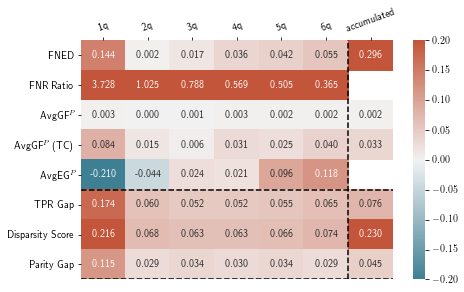

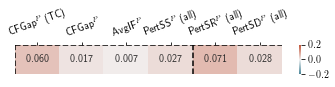

In [8]:
load_and_plot("grouped_country_by_gdp_ppp_quantile", model_name, cl="LOC")

### By Region

In [ ]:
run_and_save_res("grouped_country_by_region", model_name, task="NER")

In [ ]:
load_and_plot("grouped_country_by_region", model_name, cl="LOC")

## Gender (Names)  (PER)

In [ ]:
run_and_save_res("names_gender", model_name, task="NER")

In [ ]:
load_and_plot("names_gender", model_name, cl="PER")

In [ ]:
suite = test_model_on_saved_suite(
    suite_name="names_gender",
    mname=model_name,
    #repred=True,
    tests=[BasicSeqMetrics()],
    task="NER"
)